### Import

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

## Activation Function 激活函數

1. ReLU

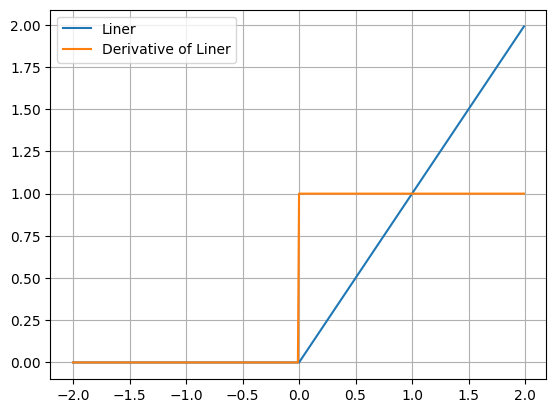

In [ ]:
x = np.arange(-2, 2, 0.01)
y = np.where(x>0, x, 0)
plt.plot(x, y, label='Liner')
plt.grid(True)
x = np.arange(-2, 2, 0.01)
y = np.where(x>0, 1, 0)
plt.plot(x, y, label='Derivative of Liner')
plt.grid(True)
plt.legend(loc='upper left')

2. Sigmoid

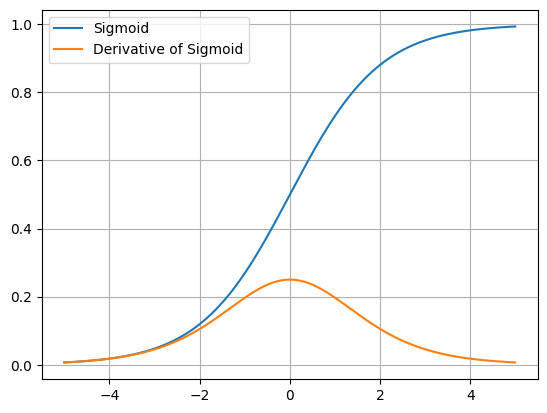

In [ ]:
x1 = np.arange(-5, 5, 0.01)
y1 = 1 / (1 + np.exp(-x1))
plt.plot(x1, y1, label='Sigmoid')
plt.grid(True)
x2 = np.arange(-5, 5, 0.01)
y2 = (1 / (1 + np.exp(-x2))) * (1 - (1 / (1 + np.exp(-x2))))
plt.plot(x2, y2, label='Derivative of Sigmoid')
plt.grid(True)
plt.legend(loc='upper left')

3. Tanh

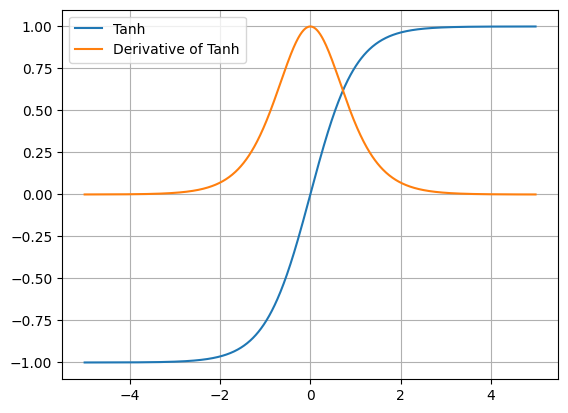

In [ ]:
x = np.arange(-5, 5, 0.01)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plt.plot(x, y, label='Tanh')
plt.grid(True)
x = np.arange(-5, 5, 0.01)
y = 1 - np.square((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))
plt.plot(x, y, label='Derivative of Tanh')
plt.grid(True)
plt.legend(loc='upper left')

## 權重初始化

1. RandomNormal (std 1 )

In [ ]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'tanh', False, initializers.RandomNormal(0, 1))(inputs) #initializers.RandomNormal(平均值, 標準差)
x2 = layers.Dense(100, 'tanh', False, initializers.RandomNormal(0, 1))(x1)
x3 = layers.Dense(100, 'tanh', False, initializers.RandomNormal(0, 1))(x2)
x4 = layers.Dense(100, 'tanh', False, initializers.RandomNormal(0, 1))(x3)
x5 = layers.Dense(100, 'tanh', False, initializers.RandomNormal(0, 1))(x4)
model_1 = keras.Model(inputs, [x1, x2, x3, x4, x5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)


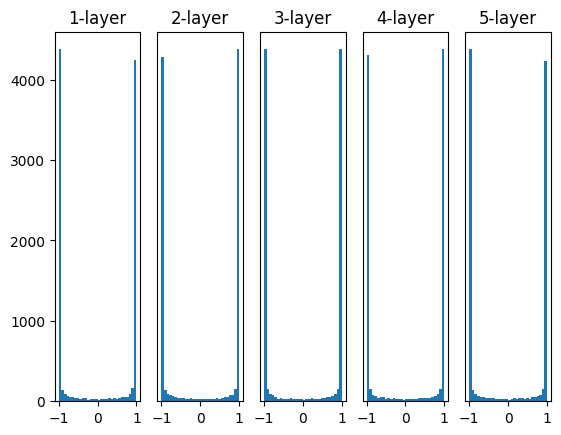

In [ ]:
x = np.random.randn(100, 100)
outputs = model_1.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[-1,1])  # 畫出值方圖
    print(layer_output.shape)
plt.show()

2. RandomNormal (std 0.01 )

In [ ]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'tanh', False, initializers.RandomNormal(0, 0.01))(inputs)
x2 = layers.Dense(100, 'tanh', False, initializers.RandomNormal(0, 0.01))(x1)
x3 = layers.Dense(100, 'tanh', False, initializers.RandomNormal(0, 0.01))(x2)
x4 = layers.Dense(100, 'tanh', False, initializers.RandomNormal(0, 0.01))(x3)
x5 = layers.Dense(100, 'tanh', False, initializers.RandomNormal(0, 0.01))(x4)
model_2 = keras.Model(inputs, [x1, x2, x3, x4, x5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step


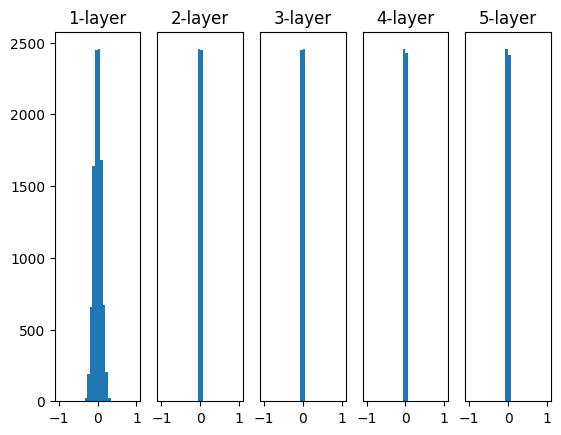

In [ ]:
x = np.random.randn(100, 100)
outputs = model_2.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[-1,1])  # 畫出值方圖
plt.show()

3. Xavier/Glorot Initialization (Sigmoid)

In [ ]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x4)
model_3 = keras.Model(inputs, [x1, x2, x3, x4, x5])

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


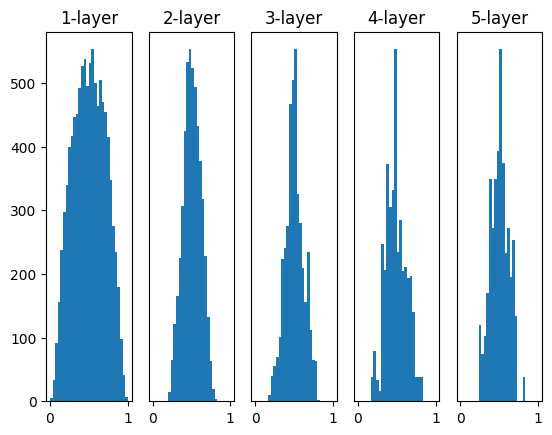

In [ ]:
x = np.random.randn(100, 100)
outputs = model_3.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

4. Xavier/Glorot Initialization (ReLU)

In [ ]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x4)
model_4 = keras.Model(inputs, [x1, x2, x3, x4, x5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


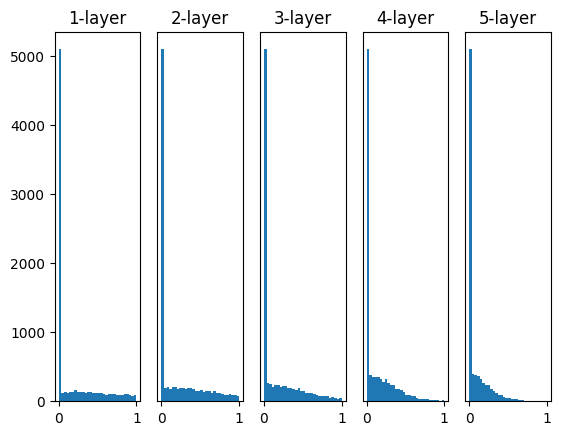

In [ ]:
x = np.random.randn(100, 100)
outputs = model_4.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

5. He initialization

In [ ]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'relu', False, initializers.he_normal())(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.he_normal())(x1)
x3 = layers.Dense(100, 'relu', False, initializers.he_normal())(x2)
x4 = layers.Dense(100, 'relu', False, initializers.he_normal())(x3)
x5 = layers.Dense(100, 'relu', False, initializers.he_normal())(x4)
model_5 = keras.Model(inputs, [x1, x2, x3, x4, x5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


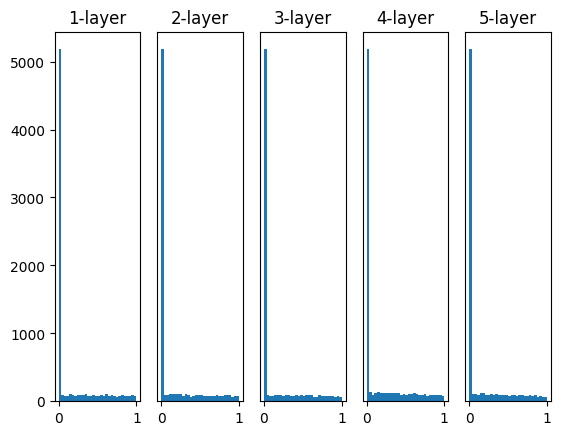

In [ ]:
x = np.random.randn(100, 100)
outputs = model_5.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

# 實驗一：使用CIFAR-10數據集實驗證三種權重初始化方法

### Import必要套件

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

### 讀取數據
載入Cifar10數據集：

In [ ]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
nb_classes=10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# X_train 切出 X_train, X_val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1001, stratify=y_train)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)
print(y_train[:10]) # x[0, :5, :5, 0]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 1) (10000, 1) (10000, 1)
[[4]
 [7]
 [8]
 [0]
 [9]
 [9]
 [5]
 [7]
 [7]
 [6]]


In [ ]:
# Convert to tf.data.Dataset.from_tensor_slices
X_train = tf.data.Dataset.from_tensor_slices(X_train)
X_val = tf.data.Dataset.from_tensor_slices(X_val)
X_test = tf.data.Dataset.from_tensor_slices(X_test)
y_train = tf.data.Dataset.from_tensor_slices(y_train.reshape(-1)) # reshape(-1): 2-d to 1-d
y_val = tf.data.Dataset.from_tensor_slices(y_val.reshape(-1))
y_test = tf.data.Dataset.from_tensor_slices(y_test.reshape(-1))

In [ ]:
# Convert to tf.data.Dataset.zip
train_data = tf.data.Dataset.zip({"x": X_train, "y": y_train})
val_data = tf.data.Dataset.zip({"x": X_val, "y": y_val})
test_data = tf.data.Dataset.zip({"x": X_test, "y": y_test})

In [ ]:
def flip(x):
    """
    flip image(翻轉影像)
    """
    x = tf.image.random_flip_left_right(x)  # 隨機左右翻轉影像
    return x

def color(x):
    """
     Color change(改變顏色)
    """
    x = tf.image.random_hue(x, 0.08)  # 隨機調整影像色調
    x = tf.image.random_saturation(x, 0.6, 1.6)  # 隨機調整影像飽和度
    x = tf.image.random_brightness(x, 0.05)  # 隨機調整影像亮度
    x = tf.image.random_contrast(x, 0.7, 1.3)  # 隨機調整影像對比度
    return x

def rotate(x):
    """
    Rotation image(影像旋轉)
    """
    # 隨機選轉n次(通過minval和maxval設定n的範圍)，每次選轉90度
    x = tf.image.rot90(x, tf.random.uniform(shape=[], minval=1, maxval=4, dtype=tf.int32))
    return x

def zoom(x, scale_min=0.6, scale_max=1.4):
    """
    Zoom Image(影像縮放)
    """
    h, w, c = x.shape
    scale = tf.random.uniform([], scale_min, scale_max)  # 隨機縮放比例
    sh = h * scale  # 縮放後影像長度
    sw = w * scale  # 縮放後影像寬度
    x = tf.image.resize(x, (sh, sw))  # 影像縮放
    x = tf.image.resize_with_crop_or_pad(x, h, w)  # 影像裁減和填補
    return x

def parse_aug_fn(dataset):
    """
    Image Augmentation(影像增強) function
    """
    x = tf.cast(dataset['x'], tf.float32) / 255.  # 影像標準化
    x = flip(x)  # 隨機水平翻轉
    # 觸發顏色轉換機率50%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: color(x), lambda: x) # tf.cond: tensorflow的if / else條件判斷式
    # 觸發影像旋轉機率0.25%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.75, lambda: rotate(x), lambda: x)
    # 觸發影像縮放機率50%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: zoom(x), lambda: x)
    # 將輸出標籤轉乘One-hot編碼
    y = tf.one_hot(dataset['y'], 10)
    return x, y

def parse_fn(dataset):
    x = tf.cast(dataset['x'], tf.float32) / 255. # casts a tensor to new type => (0,1)
    y = tf.one_hot(dataset['y'], nb_classes) # one-hot => 2-d
    return x, y

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式
batch_size = 64  # 批次大小

# 打散資料集
train_data = train_data.shuffle(buffer_size=10000)
# 載入預處理「parse_aug_fn」function，cpu數量為自動調整模式
train_data = train_data.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟（暫存空間為自動調整模式）
train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# 載入前面的資料愈處理function，cpu數量為自動調整模式
val_data = val_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
val_data = val_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# 載入前面的資料愈處理function，cpu數量為自動調整模式
test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

### 訓練網路模型

In [ ]:
def build_and_train_model(run_name, init):
    """
    run_name:傳入目前執行的任務名子
    init:傳入網路層初始化化的方式
    """
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=init)(inputs)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu', kernel_initializer=init)(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    # 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
    model = keras.Model(inputs, outputs)

    # 儲存最好的網路模型權重

    modelfiles = model_dir + '/{}-best-model.keras'.format(run_name)
    model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                                 monitor='val_categorical_accuracy',
                                                 save_best_only=True,
                                                 mode='max')
    es = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', mode='max', patience=5)

    # 設定訓練使用的優化器、損失函數和指標函數
    model.compile(keras.optimizers.Adam(),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

    # 訓練網路模型
    model.fit(train_data,
              validation_data=val_data,
              epochs=100,
              callbacks=[model_mckp, es])

In [ ]:
session_num = 1
# 設定儲存權重目錄
model_dir = 'lab4-1-logs/models/'
os.makedirs(model_dir)
# 設定要測試的三種初始化方法
weights_initialization_list = [initializers.RandomNormal(0, 0.01),
                        initializers.glorot_normal(),
                        initializers.he_normal()]

for init in weights_initialization_list:
    print('--- Running training session %d' % (session_num))
    run_name = "run-%d" % session_num
    build_and_train_model(run_name, init)  # 創建和訓練網路
    session_num += 1

--- Running training session 1
Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - categorical_accuracy: 0.0990 - loss: 2.3027 - val_categorical_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - categorical_accuracy: 0.0989 - loss: 2.3027 - val_categorical_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - categorical_accuracy: 0.0949 - loss: 2.3028 - val_categorical_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - categorical_accuracy: 0.0961 - loss: 2.3028 - val_categorical_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - categorical_accuracy: 0.0990 - loss: 2.3027 - val_categorical_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - categorical_accuracy: 0.0986 - loss: 2.3028 - val_categorical_accuracy: 0.1000 - val_loss: 2.3026
--- Running training session 2
Epoch 1/

### 比較三種初始化的訓練結果

In [ ]:
model_1 = keras.models.load_model('lab4-1-logs/models/run-1-best-model.keras')
model_2 = keras.models.load_model('lab4-1-logs/models/run-2-best-model.keras')
model_3 = keras.models.load_model('lab4-1-logs/models/run-3-best-model.keras')
loss_1, acc_1 = model_1.evaluate(test_data)
loss_2, acc_2 = model_2.evaluate(test_data)
loss_3, acc_3 = model_3.evaluate(test_data)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.0989 - loss: 2.3026
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.7583 - loss: 0.7142
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.7663 - loss: 0.6959


顯示預測的損失值與準確度結果：

In [ ]:
loss = [loss_1, loss_2, loss_3]
acc = [acc_1, acc_2, acc_3]

dict = {"Loss": loss,
        "Accuracy": acc}

df = pd.DataFrame(dict)
df

,Loss,Accuracy
0,2.302608,0.1000
1,0.728046,0.7595
2,0.704270,0.7636


# 實驗二：使用CIFAR-10數據集實驗Batch Normalization方法

建立網路模型，這邊使用到以下幾種網路層：
- keras.Input：輸入層(輸入影像大小為32x32x3)
- layers.Conv2D：卷積層(使用3x3大小的kernel)
- layers.BatchNormalization：BatchNormalization層(使用預設參數)
- layers.ReLU：ReLU激活函數層(使用在BatchNormalization層之後)
- layers.MaxPool2D：池化層(對特徵圖下採樣)
- layers.Flatten：扁平層(特徵圖轉成一維Tensor)
- layers.Dropout：Dropout層(每次訓練隨機丟棄50%網路)
- layers.Dense：全連接層(隱藏層使用ReLU激活函數，輸出層使用Softmax激活函數)

因為大部分激活函數都會在BatchNormalization之後，所以這邊的搭建與前幾個model有些差別。

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (3, 3))(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(128, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(256, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(128, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(64, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)
# 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
model_4 = keras.Model(inputs, outputs, name='model-4')
model_4.summary()  # 顯示網路架構

Model: "model-4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 11, 11, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 11, 11, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 9, 9, 128)           │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 9, 9, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 7, 7, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │         200,7

 Total params: 943,882 (3.60 MB)

 Trainable params: 942,474 (3.60 MB)

 Non-trainable params: 1,408 (5.50 KB)

建立Callback function：

In [ ]:
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/run-4-best-model.keras',
                                             monitor='val_categorical_accuracy',
                                             save_best_only=True,
                                             mode='max')
es = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', mode='max', patience=5)

設定訓練使用的優化器、損失函數和指標函數

In [ ]:
model_4.compile(keras.optimizers.Adam(),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

訓練網路模型

In [ ]:
model_4.fit(train_data,
            validation_data=val_data,
            epochs=100,
            callbacks=[model_mckp, es])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - categorical_accuracy: 0.2494 - loss: 2.1283 - val_categorical_accuracy: 0.3070 - val_loss: 1.9197
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - categorical_accuracy: 0.4171 - loss: 1.6225 - val_categorical_accuracy: 0.4111 - val_loss: 1.5921
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - categorical_accuracy: 0.4860 - loss: 1.4534 - val_categorical_accuracy: 0.5447 - val_loss: 1.2828
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - categorical_accuracy: 0.5193 - loss: 1.3652 - val_categorical_accuracy: 0.5544 - val_loss: 1.2637
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - categorical_accuracy: 0.5595 - loss: 1.2641 - val_categorical_accuracy: 0.5989 - val_loss: 1.1367
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - categorical_accuracy: 0.5842 - loss: 1.1996 - val_categorical_accuracy: 0.6268 - val_loss: 1.0519
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - categorical_a

驗證在測試集上：

In [ ]:
model_4 = keras.models.load_model('lab4-1-logs/models/run-4-best-model.keras')
loss, acc = model_4.evaluate(test_data)
print('\nModel-4 Accuracy: {}%'.format(acc))

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.8191 - loss: 0.5199

Model-4 Accuracy: 0.8194000124931335%


### 比較四種網路的訓練結果

In [ ]:
model_1 = keras.models.load_model('lab4-1-logs/models/run-1-best-model.keras')
model_2 = keras.models.load_model('lab4-1-logs/models/run-2-best-model.keras')
model_3 = keras.models.load_model('lab4-1-logs/models/run-3-best-model.keras')
model_4 = keras.models.load_model('lab4-1-logs/models/run-4-best-model.keras')
loss_1, acc_1 = model_1.evaluate(test_data)
loss_2, acc_2 = model_2.evaluate(test_data)
loss_3, acc_3 = model_3.evaluate(test_data)
loss_4, acc_4 = model_4.evaluate(test_data)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.0989 - loss: 2.3026
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.7583 - loss: 0.7142
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - categorical_accuracy: 0.7663 - loss: 0.6959
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - categorical_accuracy: 0.8191 - loss: 0.5199


In [ ]:
loss = [loss_1, loss_2, loss_3, loss_4]
acc = [acc_1, acc_2, acc_3, acc_4]

dict = {"Loss": loss,
        "Accuracy": acc}

df = pd.DataFrame(dict)
df

,Loss,Accuracy
0,2.302608,0.1000
1,0.728046,0.7595
2,0.704270,0.7636
3,0.524727,0.8194


Reference: https://github.com/taipeitechmmslab/MMSLAB-TF2